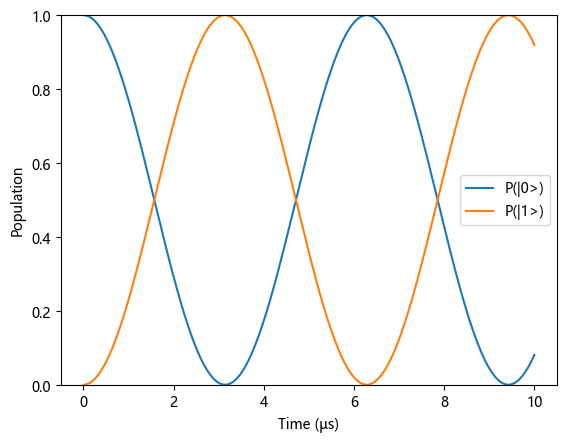

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define basis states for the four-level atom system
state_0 = basis(4, 0)
state_1 = basis(4, 1)
state_r = basis(4, 2)
state_d = basis(4, 3)

# Define Hamiltonian parameters
Omega_01 = 1e-3  # GHz
delta_1 = 0.0
Omega_r = 0.0
Delta_r = 0.0

# Hamiltonian definition for 0-1 transition only
H = Omega_01/2 * (state_0 * state_1.dag() + state_1 * state_0.dag())

# Lindblad operators for decay from |r⟩ to |0⟩, |1⟩, and |d⟩
gamma_r = 1 / (5e3)  # 1/(5 microseconds)
L0 = np.sqrt(1/16 * gamma_r) * (state_0 * state_r.dag())
L1 = np.sqrt(1/16 * gamma_r) * (state_1 * state_r.dag())
Ld = np.sqrt(7/8 * gamma_r) * (state_d * state_r.dag())
collapse_ops = [L0, L1, Ld]

# Initial state is |0>
initial_state = state_0

# Time evolution
times = np.linspace(0, 10000, 1000)  # 10 µs

# Solve the master equation
result = mesolve(H, initial_state, times, collapse_ops, [state_0 * state_0.dag(), state_1 * state_1.dag()])

# Plot results
plt.figure()
plt.plot(times /1e3, result.expect[0], label="P(|0>)")
plt.plot(times / 1e3, result.expect[1], label="P(|1>)")
plt.xlabel("Time (µs)")
plt.ylabel("Population")
plt.ylim(0,1)
plt.legend()
plt.show()


No, because you only have decay from r

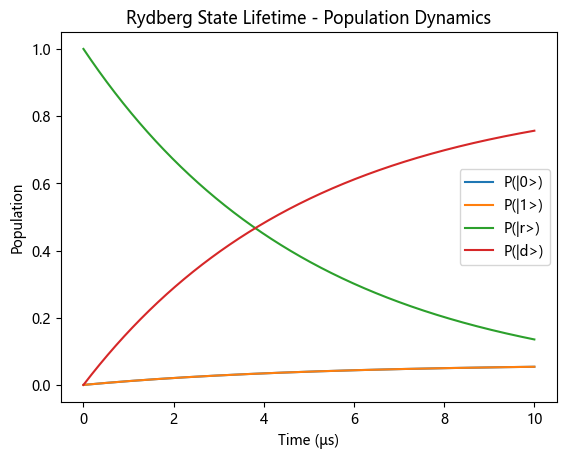

In [13]:
# Exercise 2 - Rydberg State Lifetime


# Initial state is |r>
initial_state = state_r

# Time evolution for 10 µs
times = np.linspace(0, 10000, 1000)

# Solve the master equation
result = mesolve(0 * H, initial_state, times, collapse_ops, [state_0 * state_0.dag(), state_1 * state_1.dag(), state_r * state_r.dag(), state_d * state_d.dag()])

# Plot the population dynamics
plt.figure()
plt.plot(times  /1e3, result.expect[0], label="P(|0>)")
plt.plot(times  /1e3, result.expect[1], label="P(|1>)")
plt.plot(times  /1e3, result.expect[2], label="P(|r>)")
plt.plot(times  /1e3, result.expect[3], label="P(|d>)")
plt.xlabel("Time (µs)")
plt.ylabel("Population")
plt.legend()
plt.title("Rydberg State Lifetime - Population Dynamics")
plt.show()


Yes. The population of 0 and 1 overlap because they have the same rate of 1/16. 

The population of d is exactly 14 times the population of 0 or 1

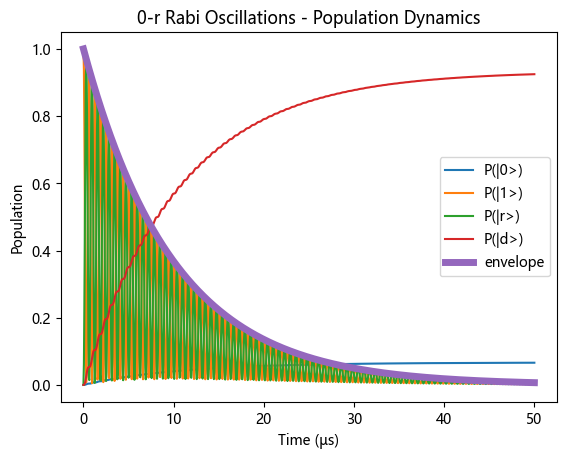

In [26]:
# Exercise 3 - 0-r Rabi Oscillations

Omega_r = 1e-2
H = Omega_r/2 * (state_1 * state_r.dag() + state_r * state_1.dag())  # Hamiltonian for |1> <-> |r>

# Initial state is |1>
initial_state = state_1

# Time evolution for 50 µs
times = np.linspace(0, 50e3, 1000)

# Solve the master equation
result = mesolve(H, initial_state, times, collapse_ops, [state_0 * state_0.dag(), state_1 * state_1.dag(), state_r * state_r.dag(), state_d * state_d.dag()])

# Plot the results
plt.figure()
plt.plot(times /1e3, result.expect[0], label="P(|0>)")
plt.plot(times /1e3, result.expect[1], label="P(|1>)")
plt.plot(times /1e3, result.expect[2], label="P(|r>)")
plt.plot(times /1e3, result.expect[3], label="P(|d>)")
plt.plot(times /1e3, np.exp(-(1 / (5e3 *2))*times), label="envelope",lw=5)
plt.xlabel("Time (µs)")
plt.ylabel("Population")
plt.legend()
plt.title("0-r Rabi Oscillations - Population Dynamics")
plt.show()


the gamma is $1/(5\mu s /2)$

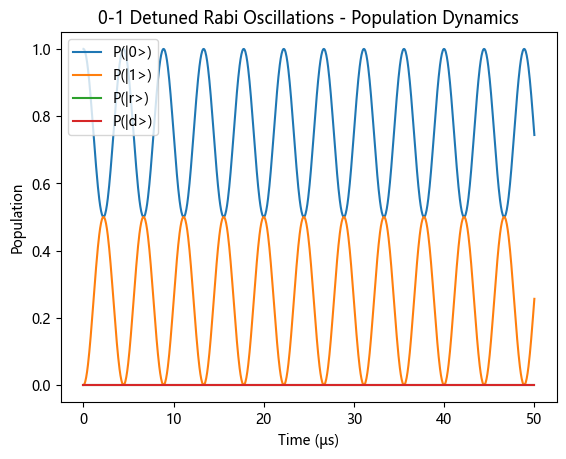

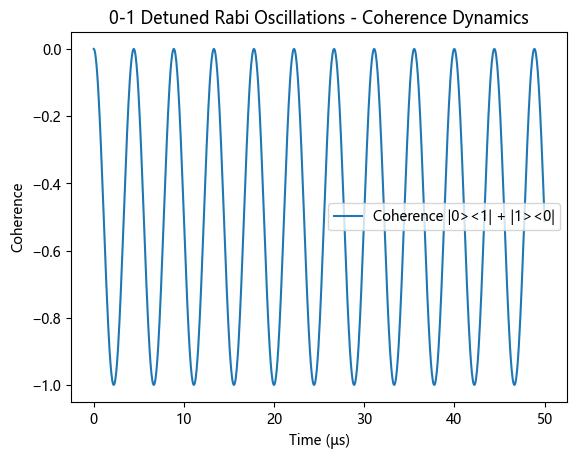

In [27]:
# Exercise 4 - 0-1 Detuned Rabi Oscillations
# Parameters
Omega_01 = 1e-3 
delta_1 = 1e-3

# Hamiltonian for detuned 0-1 Rabi oscillation
H = Omega_01/2 * (state_0 * state_1.dag() + state_1 * state_0.dag()) + delta_1 * (state_1 * state_1.dag())

# Initial state |0>
initial_state = state_0

# Time evolution
times = np.linspace(0, 50e3, 1000)

# Solve the master equation
result = mesolve(H, initial_state, times, collapse_ops, [state_0 * state_0.dag(), 
                                                         state_1 * state_1.dag(), 
                                                         state_r * state_r.dag(), 
                                                         state_d * state_d.dag(),
                                                         state_0 * state_1.dag() + state_1 * state_0.dag()])

# Plot populations and coherence
plt.figure()
plt.plot(times /1e3, result.expect[0], label="P(|0>)")
plt.plot(times /1e3, result.expect[1], label="P(|1>)")
plt.plot(times /1e3, result.expect[2], label="P(|r>)")
plt.plot(times /1e3, result.expect[3], label="P(|d>)")
plt.xlabel("Time (µs)")
plt.ylabel("Population")
plt.legend()
plt.title("0-1 Detuned Rabi Oscillations - Population Dynamics")

plt.figure()
plt.plot(times /1e3, result.expect[4].real, label="Coherence |0><1| + |1><0|")
plt.xlabel("Time (µs)")
plt.ylabel("Coherence")
plt.legend()
plt.title("0-1 Detuned Rabi Oscillations - Coherence Dynamics")
plt.show()


Detuned Rabi oscillation doesn't do complete population transfer, and has faster oscillation frequency.

In the middle of population transfer, the absolute value of the coherence is at maxima.

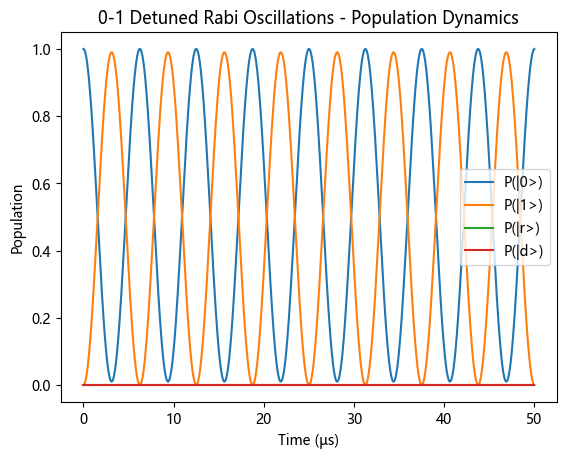

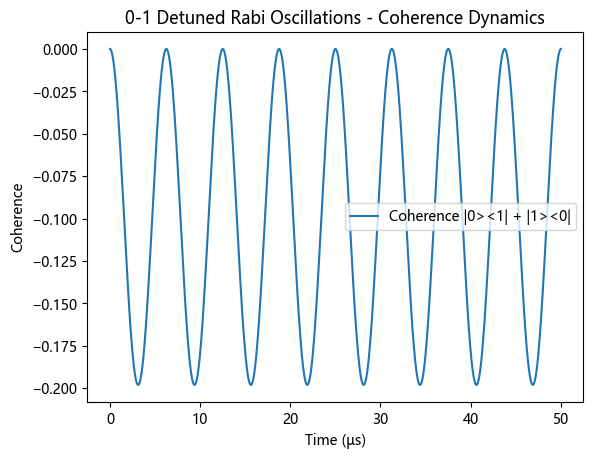

In [28]:
# Exercise 4 - 0-1 Detuned Rabi Oscillations
# Parameters
Omega_01 = 1e-3
delta_1 = 100e-6   # 100 kHz detuning

# Hamiltonian for detuned 0-1 Rabi oscillation
H = Omega_01/2 * (state_0 * state_1.dag() + state_1 * state_0.dag()) + delta_1 * (state_1 * state_1.dag())

# Initial state |0>
initial_state = state_0

# Time evolution
times = np.linspace(0, 50e3, 1000)

# Solve the master equation
result = mesolve(H, initial_state, times, collapse_ops, [state_0 * state_0.dag(), 
                                                         state_1 * state_1.dag(), 
                                                         state_r * state_r.dag(), 
                                                         state_d * state_d.dag(),
                                                         state_0 * state_1.dag() + state_1 * state_0.dag()])

# Plot populations and coherence
plt.figure()
plt.plot(times /1e3, result.expect[0], label="P(|0>)")
plt.plot(times /1e3, result.expect[1], label="P(|1>)")
plt.plot(times /1e3, result.expect[2], label="P(|r>)")
plt.plot(times /1e3, result.expect[3], label="P(|d>)")
plt.xlabel("Time (µs)")
plt.ylabel("Population")
plt.legend()
plt.title("0-1 Detuned Rabi Oscillations - Population Dynamics")

plt.figure()
plt.plot(times /1e3, result.expect[4].real, label="Coherence |0><1| + |1><0|")
plt.xlabel("Time (µs)")
plt.ylabel("Coherence")
plt.legend()
plt.title("0-1 Detuned Rabi Oscillations - Coherence Dynamics")
plt.show()


With smaller detunning the oscillation looks very like without detuning, although the population transfer is still not complete

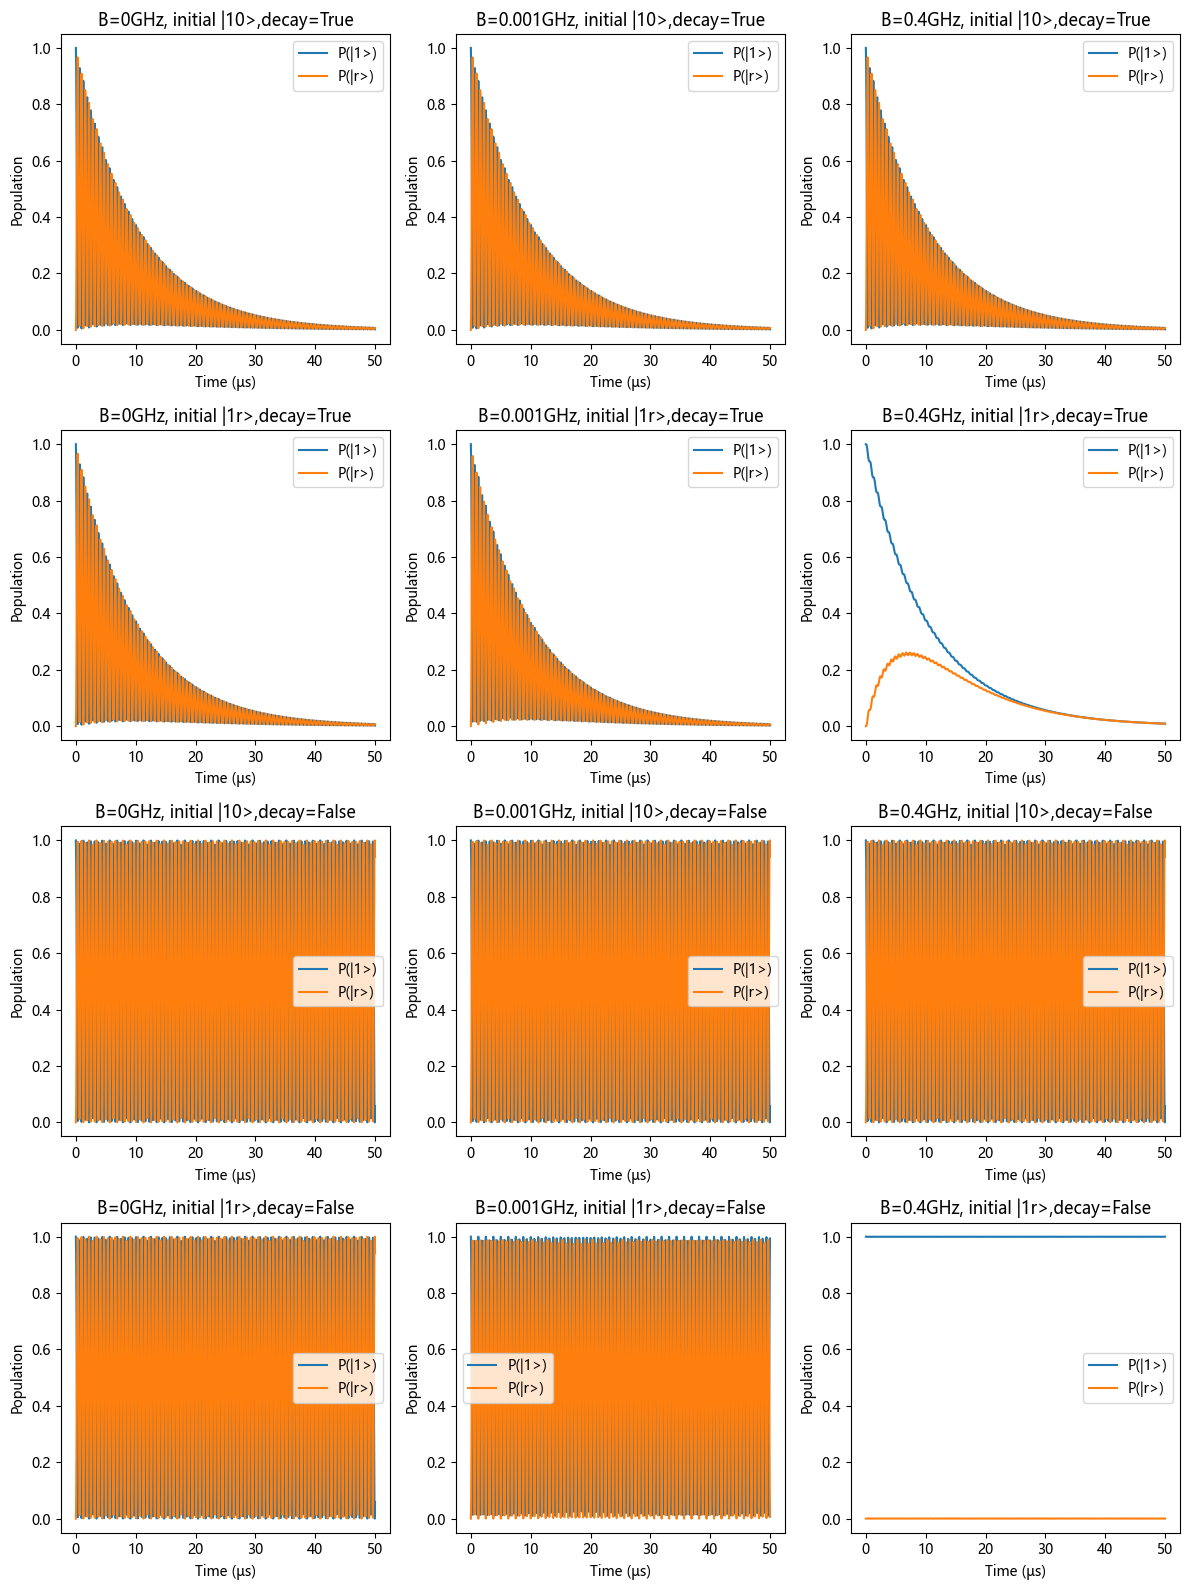

In [45]:
# Exercise 5 - Rydberg Blockade


collapse_ops = [tensor(L0, identity(4)), 
                tensor(L1, identity(4)), 
                tensor(Ld, identity(4)), 

                tensor(identity(4),L0), 
                tensor(identity(4),L1), 
                tensor(identity(4),Ld)
                ]

fig, axes = plt.subplots(4,3,figsize=(12,16))
for axes_part,decay in zip([axes[:2],axes[2:]],[1,0]):
    for ax_row, j, second_qbt in zip(axes_part,[state_0,state_r],['0','r']):
        for ax, B in zip(ax_row,[0,1e-3,0.4]):

            # Hamiltonian for Rydberg blockade with initial states
            H_blockade = B * tensor(state_r, state_r) * tensor(state_r, state_r).dag()

            # Define single-atom Hamiltonians for each qubit
            Omega_r0 = 0.01
            H_0 = tensor(Omega_r0/2*(state_1*state_r.dag()+state_r*state_1.dag()),   identity(4))
            H_total = H_0 + H_blockade

            # Solve for initial state |10> and plot population evolution
            initial_state = tensor(state_1,j)

            # Time evolution for 50 µs
            times = np.linspace(0, 50e3, 1000)

            # Solve the master equation
            result = mesolve(H_total, 
                            initial_state, 
                            times, 
                            collapse_ops if decay else None, 
                            [tensor(state_1*state_1.dag(), identity(4)), 
                            tensor(state_r*state_r.dag(), identity(4))] )

            ax.plot(times /1e3, result.expect[0], label="P(|1>)")
            ax.plot(times /1e3, result.expect[1], label="P(|r>)")
            ax.set_xlabel("Time (µs)")
            ax.set_ylabel("Population")
            ax.legend()
            ax.set_title(f"B={B}GHz, initial |1{second_qbt}>,decay={decay==1}")
    plt.tight_layout()